# Laptop Price Prediction using specifications
#By-Aarush Kumar
#Dated: August 04,2021

In [1]:
# Import the data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
import re

In [2]:
fname = "/home/aarush100616/Downloads/Projects/Laptop Price Prediction/LaptopPricePrediction.csv"
df_orig = pd.read_csv(fname)

In [3]:
fname

'/home/aarush100616/Downloads/Projects/Laptop Price Prediction/LaptopPricePrediction.csv'

In [4]:
df_orig

Unnamed: 0                                               Name  \
0             0  Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...   
1             1  Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...   
2             2  HP Pentium Quad Core - (8 GB/256 GB SSD/Window...   
3             3  HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...   
4             4  HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...   
..          ...                                                ...   
545         545  ASUS ASUS TUF Dash Series Core i7 11th Gen - (...   
546         546  ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...   
547         547  MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...   
548         548  HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...   
549         549  DELL GAMING G5 SERIES Core i5 10th Gen - (8 GB...   

                              Processor             RAM  \
0    Intel Core i5 Processor (10th Gen)   8 GB DDR4 RAM   
1    Intel Core i3 Processor (11th Gen)   8 GB DDR4 RAM   
2     Intel Pentium Quad Core Processor   8 GB DDR4 RAM   
3    Intel Core i3 Processor (11th Gen)   8 GB DDR4 RAM   
4        AMD Athlon Dual Core Processor   4 GB DDR4 RAM   
..                                  ...             ...   
545     AMD Ryzen 7 Octa Core Processor   8 GB DDR4 RAM   
546  Intel Core i7 Processor (10th Gen)  16 GB DDR4 RAM   
547     AMD Ryzen 7 Quad Core Processor   4 GB DDR4 RAM   
548     AMD Ryzen 7 Octa Core Processor  16 GB DDR4 RAM   
549  Intel Core i5 Processor (10th Gen)  12 GB DDR4 RAM   

                       Operating System              Storage  \
0    64 bit Windows 10 Operating System             1 TB HDD   
1    64 bit Windows 10 Operating System           256 GB SSD   
2    64 bit Windows 10 Operating System           256 GB SSD   
3    64 bit Windows 10 Operating System           256 GB SSD   
4    64 bit Windows 10 Operating System             1 TB HDD   
..                                  ...                  ...   
545  64 bit Windows 10 Operating System           256 GB SSD   
546  64 bit Windows 10 Operating System  1 TB HDD|256 GB SSD   
547  64 bit Windows 10 Operating System  1 TB HDD|512 GB SSD   
548         Windows 10 Operating System           512 GB SSD   
549  64 bit Windows 10 Operating System  1 TB HDD|256 GB SSD   

                                               Display  \
0                         39.62 cm (15.6 inch) Display   
1                           35.56 cm (14 Inch) Display   
2                           35.56 cm (14 inch) Display   
3                           35.56 cm (14 inch) Display   
4                         39.62 cm (15.6 inch) Display   
..                                                 ...   
545  Matrix Display, Dragon Center, Cooler Boost 5,...   
546             35.56 cm (14 inch) Touchscreen Display   
547                       33.78 cm (13.3 inch) Display   
548                       39.62 cm (15.6 inch) Display   
549                         35.56 cm (14 inch) Display   

                                              Warranty      Price  rating  
0                               1 Year Onsite Warranty    ₹43,990     3.9  
1                               1 Year Onsite Warranty    ₹43,990     4.2  
2                               1 Year Onsite Warranty    ₹31,490     4.6  
3                               1 Year Onsite Warranty    ₹40,990     4.1  
4                               1 Year Onsite Warranty    ₹27,490     4.1  
..                                                 ...        ...     ...  
545                             1 Year Onsite Warranty  ₹1,36,990     4.9  
546                             1 Year Onsite Warranty    ₹37,900     3.9  
547                             1 Year Onsite Warranty  ₹1,09,990     3.5  
548  1 Year Manufacturer Warranty on the Device and...  ₹1,22,000     4.5  
549                             1 Year Onsite Warranty    ₹79,990     4.1  

[550 rows x 10 columns]

In [5]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        550 non-null    int64  
 1   Name              550 non-null    object 
 2   Processor         550 non-null    object 
 3   RAM               550 non-null    object 
 4   Operating System  550 non-null    object 
 5   Storage           550 non-null    object 
 6   Display           550 non-null    object 
 7   Warranty          550 non-null    object 
 8   Price             550 non-null    object 
 9   rating            550 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 43.1+ KB


In [6]:
df_orig.isnull().sum()

Unnamed: 0          0
Name                0
Processor           0
RAM                 0
Operating System    0
Storage             0
Display             0
Warranty            0
Price               0
rating              0
dtype: int64

In [7]:
df_orig.dtypes

Unnamed: 0            int64
Name                 object
Processor            object
RAM                  object
Operating System     object
Storage              object
Display              object
Warranty             object
Price                object
rating              float64
dtype: object

## 2. Preprocessing the data 

### 2.1 Cleaning the data 

In [8]:
# Clean it
df = df_orig.copy()

# Drop unamed col
df = df.drop(list(df.filter(regex="Unnamed.*")),axis=1)
#print(df.dtypes)

# Convert price to a number
df.Price = df.Price.str.replace(r'[^0-9]','',regex=True).astype('int')

# Convert storage to number
# Remove the secondary storage
df.Storage = df.Storage.str.split('|').str[0]
df.Storage = np.where(df.Storage.str.split(' ').str[0] == "M.2","256 GB SSD",df.Storage)
df['Storage_GB'] = np.where(
    df.Storage.str.split(' ').str[1] == "TB",
    pd.to_numeric(df.Storage.str.split(' ').str[0],errors="coerce")*1024,
    pd.to_numeric(df.Storage.str.split(' ').str[0],errors="coerce")
)
str_med = df.Storage_GB.mean()
df.Storage_GB = df.Storage_GB.fillna(value=str_med)
df['Storage_Type'] = np.where(df.Storage.str.contains('SSD'),"SSD","HDD")
df = df.drop('Storage',axis=1)

# Convert display size to number
df.Display = pd.to_numeric(
    df.Display.str.split(' ').str[0].replace(r'[^0-9.]','',regex=True),
    errors="coerce"
)
# Fix the inches, convert to cm
df.loc[df.Display == 15.6,"Display"] = 39.624 # 15.6 * 2.54
# Fill NAs with mean
disp_med = df.Display.mean()
df.Display = df.Display.fillna(value=disp_med)

# Convert RAM to number
def ram_type(x):
    x = str(x)
    if "DDR3" in x:
        return "DDR3"
    elif "DDR4" in x:
        return "DDR4"
    else:
        return "DDR4"

df["RAM_Type"] = df.RAM.apply(ram_type)
df.RAM = pd.to_numeric(df.RAM.str.split(' ').str[0],errors="coerce")
# Fix MB values
df.RAM = df.RAM.apply(lambda x: x if x<100 else x/1024)
ram_med = df.RAM.mean()
df.RAM = df.RAM.fillna(value=ram_med)
# Convert Brand Name and Model Name
df['Brand_Name'] = df.Name.str.split(' ').str[0]
#df['Model_Name'] = df.Name.str.split(' ').str[0:2].str.join('_')
df = df.drop('Name',axis=1)

In [9]:
# Convert CPU name
def cpu_conv(x):
    x = str(x)
    #print("***",x)
    cpu_name = ""
    cpu_gen = ""
    if re.search('[0-9]{1,2}[a-z]{2} Gen',x):
        cpu_gen = re.search('([0-9]{1,2}[a-z]{2} Gen)',x).group(1)
    if re.search('i[0-9]',x):
        cpu_name = re.search('(i[0-9])',x).group(1)
    elif re.search('Ryzen [0-9]',x):
        cpu_name = re.search('(Ryzen [0-9])',x).group(1)
    elif re.search('A[0-9]',x):
        cpu_name = re.search('(A[0-9])',x).group(1)
    elif re.search('AMD \w+ ',x):
        cpu_name = re.search('(AMD \w+) ',x).group(1)
    elif re.search("Intel \w+ ",x):
        cpu_name = re.search('(Intel \w+) ',x).group(1)
    else:
        cpu_name = "Unknown"
    cpu = f"{cpu_name.replace(' ','_')}_{cpu_gen.replace(' ','_')}"
    #cpu = cpu_name.replace(' ','_')
    #print(cpu)
    return cpu
def cpu_brand(x):
    x = str(x)
    brand = "Other"
    if "Core i" in x:
        brand = "Intel"
    elif "Intel" in x:
        brand = "Intel"
    elif "AMD" in x:
        brand = "AMD"
    return brand
df["CPU_Brand"] = df.Processor.apply(cpu_brand)
df.Processor = df.Processor.apply(cpu_conv)

In [10]:
# Convert OS name
os_dict = {
    "64 bit Windows 10 Operating System": "win10",
    "Windows 10 Operating System": "win10",
    "Mac OS Operating System": "mac",
    "Pre-installed Genuine Windows 10 Operating System (Includes Built-in Security, Free Automated Updates, Latest Features)":
        "win10_sec",
    "DOS Operating System":"dos",
    "64 bit Chrome Operating System": "chrome"
}
df["Operating System"] = df["Operating System"].apply(lambda x: os_dict.get(x, np.nan))

In [11]:
# Convert warranty
def warr_conv(x):
    x = str(x).lower()
    time = 0
    if "ne-year" in x:
        time = 12
    elif "year" in x:
        time = int(x.split(' ')[0])*12
    elif "month" in x:
        time = int(x.split(' ')[0])
    return time
df.Warranty = df.Warranty.apply(warr_conv)
print(df.head())

        Processor  RAM Operating System  Display  Warranty  Price  rating  \
0     i5_10th_Gen  8.0            win10    39.62        12  43990     3.9   
1     i3_11th_Gen  8.0            win10    35.56        12  43990     4.2   
2  Intel_Pentium_  8.0            win10    35.56        12  31490     4.6   
3     i3_11th_Gen  8.0            win10    35.56        12  40990     4.1   
4     AMD_Athlon_  4.0            win10    39.62        12  27490     4.1   

   Storage_GB Storage_Type RAM_Type Brand_Name CPU_Brand  
0        1024          HDD     DDR4     Lenovo     Intel  
1         256          SSD     DDR4     Lenovo     Intel  
2         256          SSD     DDR4         HP     Intel  
3         256          SSD     DDR4         HP     Intel  
4        1024          HDD     DDR4         HP       AMD  


### 2.2 Encoding the data

In [12]:
# encode the data
# One-hot encode low-cardinality data
if 'Storage_Type' in df and 'CPU_Brand' in df and 'RAM_Type' in df:
    one_hot = pd.get_dummies(df['Storage_Type'],drop_first=True)
    df = df.drop('Storage_Type',axis=1).join(one_hot)

    one_hot = pd.get_dummies(df['CPU_Brand'],drop_first=True)
    df = df.drop('CPU_Brand',axis=1).join(one_hot)
    
    one_hot = pd.get_dummies(df['RAM_Type'],drop_first=True)
    df = df.drop('RAM_Type',axis=1).join(one_hot)

# Target encode other data
cols = [col for col in df.columns if df[col].dtype == "O"]
for col in cols:
    mean_labels = df.groupby([col]).Price.mean()
    #print(mean_labels.to_dict())
    df[col] = df[col].map(mean_labels.to_dict())
print(df)

         Processor   RAM  Operating System    Display  Warranty   Price  \
0     84646.460000   8.0      78833.879377  39.620000        12   43990   
1     69233.117647   8.0      78833.879377  35.560000        12   43990   
2     31490.000000   8.0      78833.879377  35.560000        12   31490   
3     69233.117647   8.0      78833.879377  35.560000        12   40990   
4    101195.000000   4.0      78833.879377  39.620000        12   27490   
..             ...   ...               ...        ...       ...     ...   
545  104855.806452   8.0      78833.879377  37.360008        12  136990   
546   80501.418367  16.0      78833.879377  35.560000        12   37900   
547  104855.806452   4.0      78833.879377  33.780000        12  109990   
548  104855.806452  16.0      78833.879377  39.620000        12  122000   
549   84646.460000  12.0      78833.879377  35.560000        12   79990   

     rating  Storage_GB     Brand_Name  SSD  Intel  DDR4  
0       3.9        1024   61194.201389  

## 3. Exploring the data

### 3.1 Graphical summaries

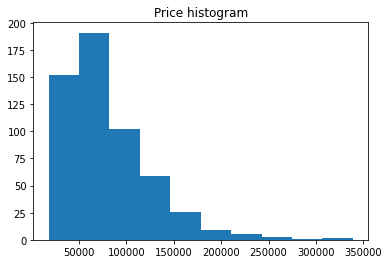

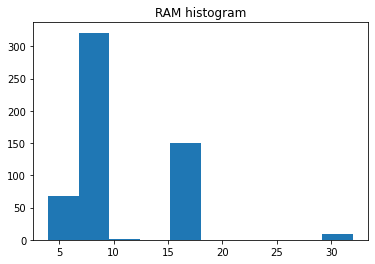

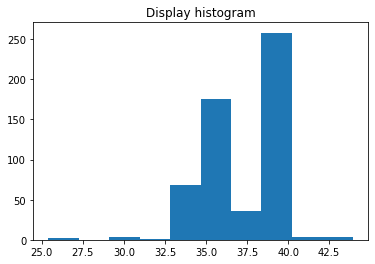

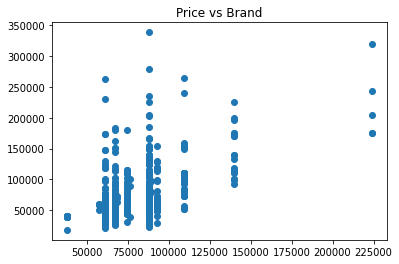

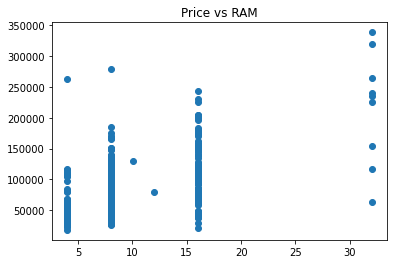

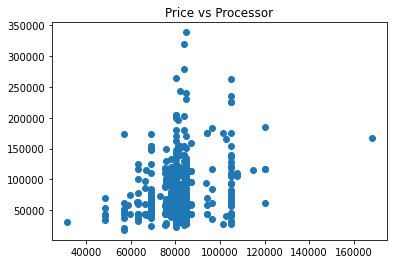

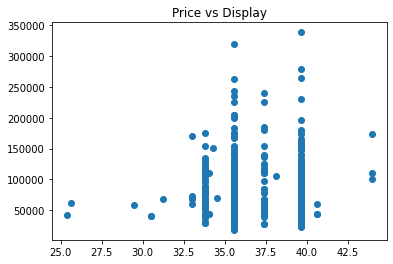

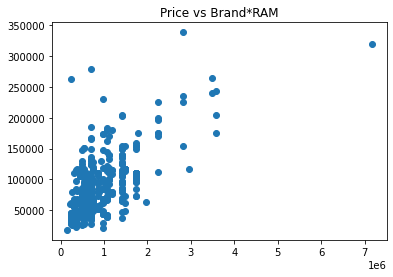

In [13]:
from matplotlib import pyplot as plt
plt.hist(df.Price)
plt.title("Price histogram")
plt.show()
plt.hist(df.RAM)
plt.title("RAM histogram")
plt.show()
plt.hist(df.Display)
plt.title("Display histogram")
plt.show()
plt.scatter(df.Brand_Name, df.Price)
plt.title("Price vs Brand")
plt.show()
plt.scatter(df.RAM, df.Price)
plt.title("Price vs RAM")
plt.show()
plt.scatter(df.Processor, df.Price)
plt.title("Price vs Processor")
plt.show()
plt.scatter(df.Display, df.Price)
plt.title("Price vs Display")
plt.show()
plt.scatter(df.Brand_Name*df.RAM,df.Price)
plt.title("Price vs Brand*RAM")
plt.show()
plt.scatter(df.Processor*df.RAM, df.Price)
plt.title("Price vs Proc*RAM")
plt.show()
plt.scatter(df.Processor*df.RAM*df.Brand_Name,df.Price)
plt.title("Price vs Proc*RAM*Brand")
plt.show()
plt.scatter(df.Processor*df.RAM*df.Brand_Name*df["Operating System"],df.Price)
plt.title("Price vs Proc*RAM*Brand*OS")
plt.show()

### 3.2 Numerical summaries

In [14]:
print(f"Summary of Price values: {df.Price.describe()}")
df["Proc_Brand_RAM"] = (df.Processor*df.RAM*df.Brand_Name)
df = df.drop("Unnamed: 0",axis=1,errors="ignore")
print("Linear correlations:")
all_corr = df.corr(method="pearson")
corrs = (all_corr.filter(['Price'])
      .query('abs(Price) > 0')
      .sort_values(by='Price',ascending=False,key=abs,axis=0)
      .assign(r2 = lambda x: x.Price**2)
)
print(corrs)

Summary of Price values: count       550.000000
mean      81364.138182
std       45119.284969
min       17990.000000
25%       46990.000000
50%       65990.000000
75%      107990.000000
max      338990.000000
Name: Price, dtype: float64
Linear correlations:
                     Price        r2
Price             1.000000  1.000000
Proc_Brand_RAM    0.701526  0.492139
RAM               0.573540  0.328948
Brand_Name        0.540727  0.292386
Processor         0.248973  0.061987
Operating System  0.241420  0.058283
Intel            -0.055424  0.003072
SSD               0.053350  0.002846
DDR4             -0.041001  0.001681
Display          -0.032377  0.001048
Warranty          0.021708  0.000471
Storage_GB       -0.017648  0.000311
rating            0.009237  0.000085


#Find RMSE from R^2
* R^2 = 1 - SSR/SST 
* R^2 - 1 = -SSR/SST
* -R^2 + 1
* 1 - R^2 = SSR/SST
* SST*(1-R^2) = SSR
#Use definition of Mean Squared Error (MSE)
* MSE = (1/n)*SSR
* RMSE = sqrt((1/n)*SSR)
* RMSE = sqrt((1/n)*SST*(1-R^2))

In [15]:
n = df.Price.size
p = len(df.columns) - 1
corr_matrix = all_corr.drop(["Price"],axis=1).drop(["Price"],axis=0).to_numpy()
price_corr = all_corr.filter(['Price']).query('Price != 1').to_numpy()
total_r2 = (price_corr.transpose() @ np.linalg.inv(corr_matrix) @ price_corr).item()
#total_r2 = 1 - ((1 - total_r2)*(n-1)/(n-p-1))
sst = sum(np.square(df.Price - df.Price.mean()))
rmse = np.sqrt((1/n)*sst*(1-total_r2))
print(f"Ideal R^2: {total_r2}")
print(f"Ideal RMSE: {rmse}")

Ideal R^2: 0.5213529173269124
Ideal RMSE: 31187.082140731516


## 4. Regression models

### 4.1 Train models

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
y = df.Price
X = df.drop('Price',axis=1,errors="ignore")#.filter(["Brand","RAM","Processor"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
# Linear model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
# Random forest
rf_params = {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}
rf = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features="sqrt",max_depth=5, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                      random_state=1)

In [19]:
# Gradient Boosting
gb_params = {'n_estimators': 200, 'min_samples_split': 100, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 15}
gb = GradientBoostingRegressor(n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features="sqrt",max_depth=15, random_state=1)
gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=15, max_features='sqrt',
                          min_samples_leaf=10, min_samples_split=100,
                          n_estimators=200, random_state=1)

In [20]:
# Extra Trees
et_params = {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}
et = ExtraTreesRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features="sqrt",max_depth=5, random_state=1)
et.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                    random_state=1)

In [21]:
# Voting regressor
#vr = VotingRegressor([('lm',lm),('rf',rf),('gb',gb),('et',et)])
vr = VotingRegressor([('lm',lm),('rf',rf)])
vr.fit(X_train, y_train)

models = [lm, rf, gb, et, vr]

### 4.2 Cross-validation 

In [22]:
for model in models:
    xval = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    xvm = xval.mean()
    xvs = xval.std()
    mname = str(model).split('(')[0]
    print(f"{mname}: Mean={xvm:.2f}, Stdev={xvs:.2f}, 95% CI=({xvm-2*xvs:.2f},{xvm+2*xvs:.2f})")

LinearRegression: Mean=0.46, Stdev=0.13, 95% CI=(0.20,0.73)
RandomForestRegressor: Mean=0.40, Stdev=0.11, 95% CI=(0.18,0.63)
GradientBoostingRegressor: Mean=0.30, Stdev=0.17, 95% CI=(-0.05,0.65)
ExtraTreesRegressor: Mean=0.36, Stdev=0.09, 95% CI=(0.17,0.55)
VotingRegressor: Mean=0.45, Stdev=0.11, 95% CI=(0.23,0.68)


### 4.3 Tuning hyperparameters

In [23]:
rf_tune = False
gb_tune = False
et_tune = False
for model in models:
    mname = str(model).split('(')[0]
    #print(f"{mname}: {model.get_params()}\n")
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
# bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rg2 = random_grid.copy()
#rg2['gamma']
if rf_tune:
    rs = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 4)
    rs.fit(X_train, y_train)
    print(rs.best_params_)
    print(rs.best_score_)
if gb_tune:
    rs = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 4)
    rs.fit(X_train, y_train)
    print(rs.best_params_)
    print(rs.best_score_)
if et_tune:
    rs =  RandomizedSearchCV(estimator = et, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 4)
    rs.fit(X_train, y_train)
    print(rs.best_params_)
    print(rs.best_score_)

### 4.4 Model evalulation on testing data 

In [24]:
for model in models:
    mname = str(model).split('(')[0]
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    mae = mean_absolute_error(y_test,y_pred)
    y_m = y.mean()
    print(f"{mname}:")
    print("RMSE: " + str(rmse))
    print("RMSE ($): " + str(rmse*0.013))
    print("RMSE (%): " + str(rmse/y_m*100))
    print("MAE: " + str(mae))
    print("MAE ($): " + str(mae*0.013))
    print("MAE (%): " + str(mae/y_m*100))
    print("R^2 (training): " + str(r2_score(y_train,model.predict(X_train))))
    print("R^2: " + str(r2_score(y_test,y_pred)))
    print("\n")

LinearRegression:
RMSE: 30597.302909786693
RMSE ($): 397.764937827227
RMSE (%): 37.60539175307585
MAE: 21208.573355635745
MAE ($): 275.7114536232647
MAE (%): 26.06624224082922
R^2 (training): 0.5126316008146198
R^2: 0.5212740719090255


RandomForestRegressor:
RMSE: 31466.31444193258
RMSE ($): 409.0620877451235
RMSE (%): 38.67344403208355
MAE: 21505.31758292928
MAE ($): 279.56912857808067
MAE (%): 26.430953566881026
R^2 (training): 0.5916270316915389
R^2: 0.4936947691650986


GradientBoostingRegressor:
RMSE: 33310.28904823856
RMSE ($): 433.0337576271013
RMSE (%): 40.9397675592687
MAE: 23071.515842136258
MAE ($): 299.9297059477713
MAE (%): 28.355878102684645
R^2 (training): 0.7601466326667662
R^2: 0.4326155092452474


ExtraTreesRegressor:
RMSE: 31787.65855015161
RMSE ($): 413.2395611519709
RMSE (%): 39.06838966218529
MAE: 22898.181127675416
MAE ($): 297.6763546597804
MAE (%): 28.14284233737794
R^2 (training): 0.48807592363731855
R^2: 0.48330086260578


VotingRegressor:
RMSE: 30699.767824

### 4.5 Checking assumptions of linear regression

Residuals likely close to normal
Mu: -810.39, Sigma: 30586.57, skew: 1.81, ex. kurt: 6.9


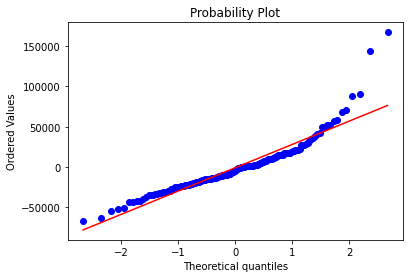

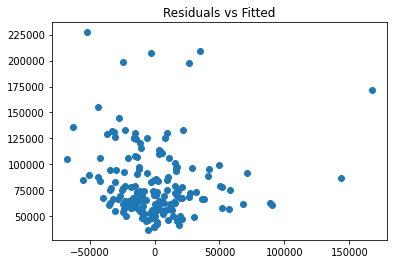

In [25]:
import scipy as sc
import seaborn as sb
# Test normality of residuals
y_pred = lm.predict(X_test)
res = (y_test - y_pred)
#res = (y_train - lm.predict(X_train))
mu = np.mean(res)
s = np.std(res)
skew = sc.stats.skew(res)
kurt = sc.stats.kurtosis(res,fisher=True)
if abs(kurt) > 7 or abs(skew) > 2:
    print("Residuals likely non-normal")
else:
    print("Residuals likely close to normal")
print(f"Mu: {round(mu,2)}, Sigma: {round(s,2)}, skew: {round(skew,2)}, ex. kurt: {round(kurt,2)}")
sc.stats.probplot(res,plot=plt);
plt.show()
plt.scatter(res, y_pred)
plt.title("Residuals vs Fitted")
plt.show()

## 5. Discussion

The best price predicting model (Linear Regression) on the testing data got an R^2 of about 0.521 on the testing data, with a Root Mean Square Error of 30,597, or about a 38% error on average. The second best model, the Voting Regressor (based on Linear Regression and Random Forest), had an R^2 of 0.518, and about the same performance as Linear Regression on cross-validation (mean R^2 of 0.45 vs 0.46), and with a slightly lower standard deviation of 0.11 compared to the 0.13 for Linear Regression.
The features in the data with the strongest linear correlations with Price are RAM (r=0.57), Brand Name (r=0.54), Operating System (r=0.25), and Processor (r=0.24). RAM and Brand Name are by far the strongest of the correlations with price. RAM has a positive correlation with price. Warranty (r=0.02), the presence of an SSD (r=0.05), and rating (r=0.01) have a small positive correlation with price. Having an Intel Processor (r=-0.05), DDR4 memory (r=-0.04), more storage (r=-0.02), and a larger display (r=-0.03) have a negative correlation with price.